<a href="https://colab.research.google.com/github/smalaboy/EEG-epileptic-spikes-detection/blob/main/Experimentation%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
positive_shape = [400, 5, 768]  # Shape of the data to read for multivariate classifier
negative_shape = [2000, 5, 768]
testing_shape = [1200, 5, 768]  #

In [ ]:
positive_series = np.fromfile('/content/drive/MyDrive/datasets/exp1-train-400pos.bin', dtype=np.float32).reshape(positive_shape)
positive_series2 = np.fromfile('/content/drive/MyDrive/datasets/exp2-train-400pos.bin', dtype=np.float32).reshape(positive_shape)
negative_series = np.fromfile('/content/drive/MyDrive/datasets/exp1-train-2000neg.bin', dtype=np.float32).reshape(negative_shape)
negative_series2 = np.fromfile('/content/drive/MyDrive/datasets/exp2-train-2000neg.bin', dtype=np.float32).reshape(negative_shape)

In [ ]:
# def readucr(filename):
#     data = np.loadtxt(filename, delimiter="\t")
#     y = data[:, 0]
#     x = data[:, 1:]
#     return x, y.astype(int)


# root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

# x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
# x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

In [ ]:
# x_train.shape

In [ ]:
# y_train

In [ ]:
p_train = np.concatenate((positive_series[:350], positive_series2[:350] ))
p_test = np.concatenate((positive_series[350:], positive_series2[350:]))
n_train = np.concatenate((negative_series[:1750], negative_series2[:1750]))
n_test = np.concatenate((negative_series[1750:], negative_series2[1750:]))

In [ ]:
X_train = np.concatenate((p_train, n_train))
# (row - row.min()) / (row.max() - row.min())
# X_train = [[(row - row.min()) / (row.max() - row.min()) for row in rowset] for rowset in X_train]
# print(X_train)
X_test = np.concatenate((p_test, n_test))
# X_test = [[(row - row.min()) / (row.max() - row.min()) for row in rowset] for rowset in X_test]
# print(X_train[0])

In [ ]:
y_train = np.concatenate((np.ones((700,)), np.zeros((3500,))))
y_test = np.concatenate((np.ones((100,)), np.zeros((500,))))

In [ ]:
idx = np.random.permutation(len(X_train))

y_train[y_train == 0.0] = 0
y_test[y_test == 0.0] = 0
y_train[y_train == 1.0] = 1
y_test[y_test == 1.0] = 1

X_tr = X_train[idx]
y_tr = y_train[idx]
print(X_tr[5])
print(y_tr[5])

print(y_test[y_test == 0.0])

[[  0.5480144    0.6103192   -0.37583873 ... -23.480387   -24.57628
  -25.969906  ]
 [  5.089529     6.0017834    6.453919   ...  -2.0138972   -1.9517859
   -1.7131143 ]
 [-20.066511   -19.999077   -19.050385   ... -29.651089   -30.460964
  -30.441326  ]
 [ -3.3392084   -2.562836    -2.4850245  ... -18.089787   -16.734377
  -15.392832  ]
 [-18.928085   -19.028475   -19.311224   ...   9.590018    11.059586
   12.045971  ]]
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
X_tr.shape[1:]

(5, 768)

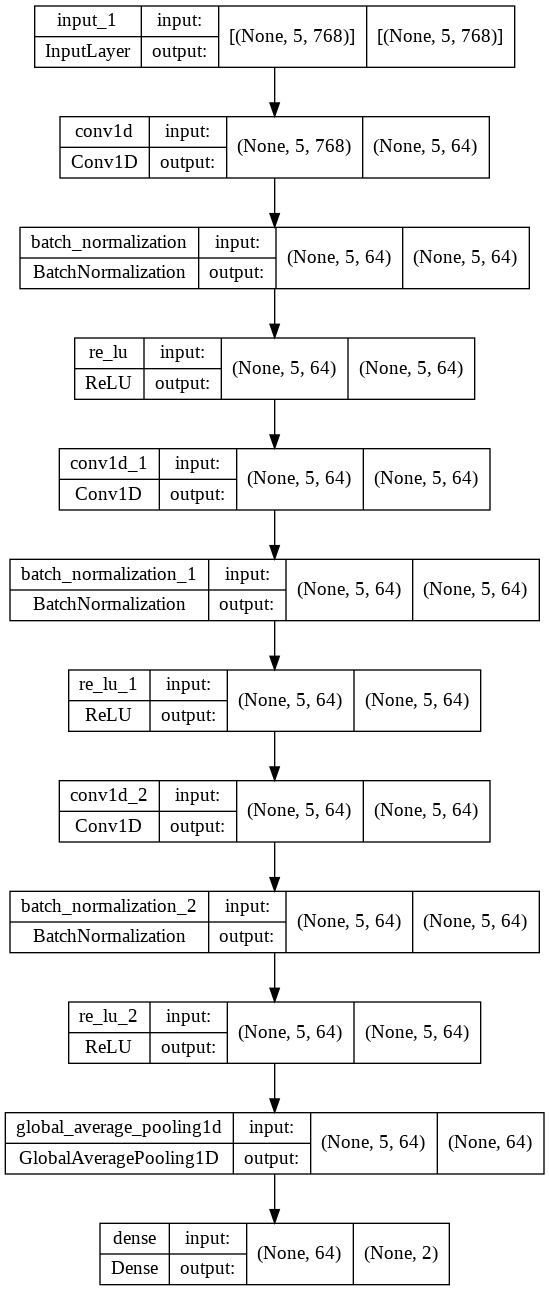

In [ ]:
num_classes = 2

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_tr.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.00999
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_tr,
    y_tr,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
105/105 [==============================] - 3s 13ms/step - loss: 0.2256 - sparse_categorical_accuracy: 0.9176 - val_loss: 0.2701 - val_sparse_categorical_accuracy: 0.9345 - lr: 0.0010
Epoch 2/500
105/105 [==============================] - 1s 10ms/step - loss: 0.1169 - sparse_categorical_accuracy: 0.9625 - val_loss: 0.1642 - val_sparse_categorical_accuracy: 0.9500 - lr: 0.0010
Epoch 3/500
105/105 [==============================] - 1s 9ms/step - loss: 0.0826 - sparse_categorical_accuracy: 0.9738 - val_loss: 0.1815 - val_sparse_categorical_accuracy: 0.9440 - lr: 0.0010
Epoch 4/500
105/105 [==============================] - 1s 9ms/step - loss: 0.0656 - sparse_categorical_accuracy: 0.9783 - val_loss: 0.1857 - val_sparse_categorical_accuracy: 0.9476 - lr: 0.0010
Epoch 5/500
105/105 [==============================] - 1s 12ms/step - loss: 0.0365 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.1710 - val_sparse_categorical_accuracy: 0.9488 - lr: 0.0010
Epoch 6/500
105/105 [======

In [ ]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

19/19 [==============================] - 0s 4ms/step - loss: 0.1743 - sparse_categorical_accuracy: 0.9350
Test accuracy 0.9350000023841858
Test loss 0.17427650094032288


In [ ]:
preds = model.predict(X_test)
import numpy as np
# index_min = np.argmin(values)
# res = np.apply_along_axis(lambda row: np.argmax(row), 1, preds)
res = np.argmax(preds, axis=1)
print(res)
# for _ in preds:
#   print(np.argmax(_))

[1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

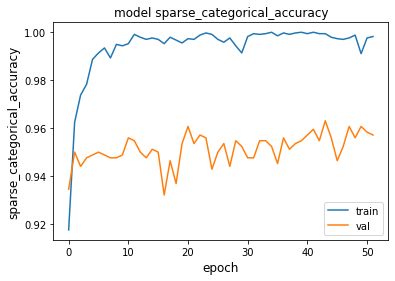

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

Full dataset

In [ ]:
positive_series = np.fromfile('/content/drive/MyDrive/datasets/exp1-train-400pos.bin', dtype=np.float32).reshape(positive_shape)
positive_series2 = np.fromfile('/content/drive/MyDrive/datasets/exp2-train-400pos.bin', dtype=np.float32).reshape(positive_shape)
negative_series = np.fromfile('/content/drive/MyDrive/datasets/exp1-train-2000neg.bin', dtype=np.float32).reshape(negative_shape)
negative_series2 = np.fromfile('/content/drive/MyDrive/datasets/exp2-train-2000neg.bin', dtype=np.float32).reshape(negative_shape)

In [ ]:
X_ = np.concatenate((positive_series, positive_series2, negative_series, negative_series2))
y_ = np.concatenate((np.ones((800,)), np.zeros((4000,))))

idx = np.random.permutation(len(X_))
X = X_[idx]
y = y_[idx]

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "full_best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.00999
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X,
    y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
120/120 [==============================] - 2s 12ms/step - loss: 0.1199 - sparse_categorical_accuracy: 0.9596 - val_loss: 0.1283 - val_sparse_categorical_accuracy: 0.9531 - lr: 0.0010
Epoch 2/500
120/120 [==============================] - 1s 9ms/step - loss: 0.0800 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.1378 - val_sparse_categorical_accuracy: 0.9542 - lr: 0.0010
Epoch 3/500
120/120 [==============================] - 1s 10ms/step - loss: 0.0539 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.1567 - val_sparse_categorical_accuracy: 0.9521 - lr: 0.0010
Epoch 4/500
120/120 [==============================] - 1s 10ms/step - loss: 0.0463 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.1126 - val_sparse_categorical_accuracy: 0.9625 - lr: 0.0010
Epoch 5/500
120/120 [==============================] - 1s 10ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9906 - val_loss: 0.2925 - val_sparse_categorical_accuracy: 0.9385 - lr: 0.0010
Epoch 6/500
120/120 [=====

In [ ]:
test_series = np.fromfile('/content/drive/MyDrive/datasets/exp12-test-1200.bin', dtype=np.float32).reshape(testing_shape)

In [ ]:
predictions = model.predict(test_series)
final_predictions = np.argmax(predictions, axis=1)

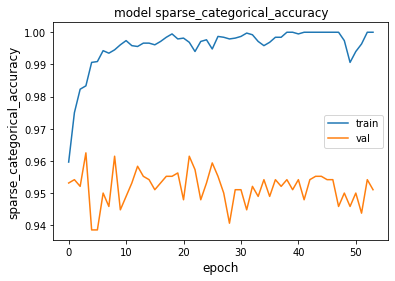

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
import pandas as pd
data = {
    "outcome": list(map(int, final_predictions)),
    "id": list(range(1200))
    }

df = pd.DataFrame(data=data)
df

,outcome,id
0,1,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
1195,0,1195
1196,0,1196
1197,0,1197
1198,0,1198


In [ ]:
df.to_csv("csv_file_full.csv", index=False)